In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import timeit

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#1 Создать матрицу nxn из упорядоченных целых чисел от 0 до n^2, так чтобы при изменении n оно генерировалось быстрее чем  n секунд

In [2]:
def square_matrix(n):
    matrix = [[j + i*n for j in range(n)] for i in range(n)]
    #matrix = [[random.randint(0, n**2) for j in range(n)] for i in range(n)]

    return matrix

In [3]:
square_matrix(10)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]

In [4]:
#%%timeit
time_res = %timeit -o square_matrix(10)

10.8 µs ± 621 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [97]:
print(time_res)
print(time_res.average)

10.1 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.0148682000000399e-05


In [121]:
timeit.timeit(stmt='square_matrix(n)', setup='n=10', globals=globals(), number=100000)

1.0534255999996276

In [123]:
def my_timeit(stmt, setup, n):
    return timeit.timeit(stmt=stmt, setup=setup, globals=globals(), number=n) / n

In [133]:
my_timeit('square_matrix(n)', 'n=10', 700000)

1.0529518285714273e-05

In [143]:
times = []

for i in range(15):
    times.append(my_timeit('square_matrix(n)', f'n={i}', 100000))
    print(f'i = {i}, time = {times[i]}')

i = 0, time = 4.1458499999862397e-07
i = 1, time = 9.485330000006797e-07
i = 2, time = 1.4521799999965879e-06
i = 3, time = 2.150615000000471e-06
i = 4, time = 3.2838769999943905e-06
i = 5, time = 3.943403000002945e-06
i = 6, time = 5.132877000005465e-06
i = 7, time = 6.083486000006815e-06
i = 8, time = 7.61678199999551e-06
i = 9, time = 8.72090599999865e-06
i = 10, time = 1.0555584000003363e-05
i = 11, time = 1.1887792000006812e-05
i = 12, time = 1.3533231000001251e-05
i = 13, time = 1.532714500000111e-05
i = 14, time = 1.6787761999994472e-05


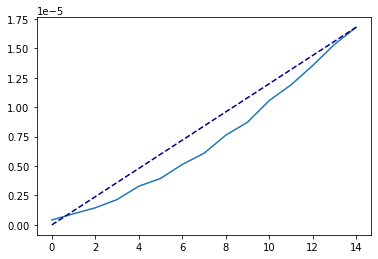

In [176]:
plt.plot(times)
plt.plot([0, 14], [0, times[14]], color='darkblue', linestyle='--');

Среднее значение по столбцам

In [5]:
def col_mean(matrix):
    mean_col = []
    
    for i in range(len(matrix)):
        s = 0
        for j in range(len(matrix[i])):
            s += matrix[j][i]
        mean_col.append(s/len(matrix))
        
    return mean_col

In [6]:
col_mean(square_matrix(10))

[45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0]

Транспонировать матрицу

In [138]:
def transpose_matrix(matrix):
    matrix_T = []
    temp = []
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            temp.append(matrix[j][i])
        matrix_T.append(temp)
        temp = []
            
    return matrix_T

In [139]:
transpose_matrix(square_matrix(10))

[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
 [2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
 [3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
 [4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
 [5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
 [6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
 [7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
 [8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
 [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]]

## Работа с датасетом

In [142]:
data = pd.read_csv('forest_dataset.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [148]:
delayed_data = data[int(0.8 * len(data)):]
all_data = data[:int(0.8 * len(data))]

In [150]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [152]:
delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

In [153]:
two_class_labels_indices = (labels == 1) + (labels == 2)

In [172]:
two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [178]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, 
                                                                                        two_class_labels, test_size = 0.2)

In [213]:
quan_two_class_feature_matrix = two_class_feature_matrix[:, :10]
quan_two_class_labels = two_class_labels

In [214]:
qual_two_class_feature_matrix = two_class_feature_matrix[:, 10:]
qual_two_class_labels = two_class_labels

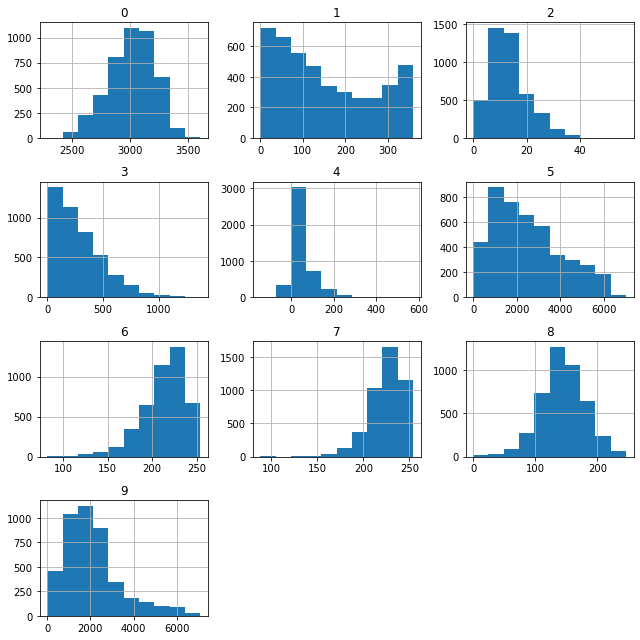

In [193]:
df = pd.DataFrame(train_feature_matrix)
df.iloc[:, 0:10].hist(figsize=(9,9))
plt.tight_layout()

In [201]:
model_lgr = make_pipeline(StandardScaler(), LogisticRegression())
model_lgr.fit(train_feature_matrix, train_labels)
y_pred = model_lgr.predict(test_feature_matrix)

acc_lgr = accuracy_score(test_labels, y_pred)

print(f'Accuracy: {acc_lgr*100}')

Accuracy: 76.74841053587647


In [204]:
model_svc = make_pipeline(StandardScaler(), SVC())
model_svc.fit(train_feature_matrix, train_labels)
y_pred = model_svc.predict(test_feature_matrix)

acc_svc = accuracy_score(test_labels, y_pred)

print(f'Accuracy: {acc_svc*100}')

Accuracy: 79.01907356948229


In [208]:
def my_pipe(features, labels):
    train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(features, 
                                                                                            labels, test_size = 0.2)
    model_svc = make_pipeline(StandardScaler(), SVC())
    model_svc.fit(train_feature_matrix, train_labels)
    y_pred = model_svc.predict(test_feature_matrix)
    acc_svc = accuracy_score(test_labels, y_pred)
    print(f'Accuracy: {acc_svc*100}')

In [215]:
# Все признаки
my_pipe(two_class_feature_matrix, two_class_labels)

Accuracy: 79.10990009082653


In [216]:
# Только количественные признаки
my_pipe(qual_two_class_feature_matrix, qual_two_class_labels)

Accuracy: 66.30336058128974


In [217]:
# Только качественные признаки
my_pipe(quan_two_class_feature_matrix, quan_two_class_labels)

Accuracy: 77.47502270663034
